# Regresión Lineal Simple
Los modelos lineales son una de las herramientas más importantes del análisis cuantitativo. Los utilizamos cuando queremos predecir –o explicar– una variable dependiente a partir de una variable independiente. El uso mismo de la terminología de variables dependientes e independientes nos da una pista del abordaje: el ajuste de modelos lineales busca encontrar una función –en el sentido matemático– que nos permite expresar a una variable a partir de otras.

### Autores
   * Efrén Jiménez

## Análisis del Problema
Este conjunto de datos contiene precios de venta de casas para el Condado de King, que incluye Seattle. Incluye casas vendidas entre mayo de 2014 y mayo de 2015.

Es un gran conjunto de datos para evaluar modelos de regresión simples.
![Proceso ROC](img/dataset-cover.jpg)

## Entendimiento de los Datos

Con el fin de analizar y tratar de predecir el precio de las casas ubicadas en el condado de King, se trabajó con un conjunto de datos que contiene 21613 observaciones y 2 variables:

- price (precio): numérica, con un rango de 75000 a 7700000.
- sqft_lot (metros cuadrados del lote): numérica, con un rango de 520 a 1651359

In [187]:
casas <- read.csv('kc_house_data.csv', header = T, na.strings = '?')

#Utilice la función str() para ver la estructura del conjunto de datos:
summary(casas)

cor(casas[,c(3,4,5,6,7,8,9,10,11,12,12,13,14,15)])


       id                         date           price            bedrooms     
 Min.   :1.000e+06   20140623T000000:  142   Min.   :  75000   Min.   : 0.000  
 1st Qu.:2.123e+09   20140625T000000:  131   1st Qu.: 321950   1st Qu.: 3.000  
 Median :3.905e+09   20140626T000000:  131   Median : 450000   Median : 3.000  
 Mean   :4.580e+09   20140708T000000:  127   Mean   : 540088   Mean   : 3.371  
 3rd Qu.:7.309e+09   20150427T000000:  126   3rd Qu.: 645000   3rd Qu.: 4.000  
 Max.   :9.900e+09   20150325T000000:  123   Max.   :7700000   Max.   :33.000  
                     (Other)        :20833                                     
   bathrooms      sqft_living       sqft_lot           floors     
 Min.   :0.000   Min.   :  290   Min.   :    520   Min.   :1.000  
 1st Qu.:1.750   1st Qu.: 1427   1st Qu.:   5040   1st Qu.:1.000  
 Median :2.250   Median : 1910   Median :   7618   Median :1.500  
 Mean   :2.115   Mean   : 2080   Mean   :  15107   Mean   :1.494  
 3rd Qu.:2.500   3rd Qu.:

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,grade.1,sqft_above,sqft_basement,yr_built
price,1.00000000,0.308349598,0.52513751,0.70203505,0.089660861,0.256793888,0.266369434,0.39729349,0.03636179,0.66743426,0.66743426,0.60556730,0.32381602,0.05401153
bedrooms,0.30834960,1.000000000,0.51588364,0.57667069,0.031703243,0.175428935,-0.006582479,0.07953185,0.02847210,0.35696673,0.35696673,0.47760016,0.30309338,0.15417807
bathrooms,0.52513751,0.515883638,1.00000000,0.75466528,0.087739662,0.500653173,0.063743629,0.18773702,-0.12498193,0.66498253,0.66498253,0.68534248,0.28377003,0.50601944
sqft_living,0.70203505,0.576670693,0.75466528,1.00000000,0.172825661,0.353949290,0.103817818,0.28461119,-0.05875259,0.76270448,0.76270448,0.87659660,0.43504297,0.31804877
sqft_lot,0.08966086,0.031703243,0.08773966,0.17282566,1.000000000,-0.005200991,0.021603683,0.07471011,-0.00895825,0.11362112,0.11362112,0.18351228,0.01528620,0.05308037
floors,0.25679389,0.175428935,0.50065317,0.35394929,-0.005200991,1.000000000,0.023698320,0.02944382,-0.26376795,0.45818251,0.45818251,0.52388471,-0.24570454,0.48931942
waterfront,0.26636943,-0.006582479,0.06374363,0.10381782,0.021603683,0.023698320,1.000000000,0.40185735,0.01665316,0.08277491,0.08277491,0.07207459,0.08058794,-0.02616109
view,0.39729349,0.079531852,0.18773702,0.28461119,0.074710106,0.029443820,0.401857351,1.00000000,0.04598974,0.25132058,0.25132058,0.16764934,0.27694658,-0.05343985
condition,0.03636179,0.028472104,-0.12498193,-0.05875259,-0.008958250,-0.263767946,0.016653157,0.04598974,1.00000000,-0.14467367,-0.14467367,-0.15821362,0.17410491,-0.36141656
grade,0.66743426,0.356966725,0.66498253,0.76270448,0.113621124,0.458182514,0.082774914,0.25132058,-0.14467367,1.00000000,1.00000000,0.75592294,0.16839182,0.44696320


## Exploración de los Datos

In [188]:
#librerías utilizadas
library(caTools)
library(ggplot2)
#Evitar mostrar warning messages
options(warn=-1)

#establezca el directorio de trabajo
#En caso de que el sitio este en algún directorio de la maquina
#setwd('auto-mpg.txt')

#cargue el archivo a una variable que se llame casas usando la función read.csv
casas <- read.csv('kc_house_data.csv', header = T, na.strings = '?')

#Selecionar 
casas<-casas[,c(3,6)]

#Utilice la función str() para ver la estructura del conjunto de datos:
summary(casas)

#Dividir el conjunto de datos en uno de entrenamiento y otro de pruebas:
set.seed(1376)
splt <- sample.split(casas$price, SplitRatio = 0.7)
casas.entrenamiento <- casas[splt, ]
casas.prueba <- casas[!splt, ]


     price          sqft_living   
 Min.   :  75000   Min.   :  290  
 1st Qu.: 321950   1st Qu.: 1427  
 Median : 450000   Median : 1910  
 Mean   : 540088   Mean   : 2080  
 3rd Qu.: 645000   3rd Qu.: 2550  
 Max.   :7700000   Max.   :13540  

>Es importante siempre validar los rangos de los conjuntos de datos creados, para evitar caer en extrapolación:

In [189]:
print(".................................Entrenamiento..................................")
summary(casas.entrenamiento)
print(".................................Pruebas........................................")
summary(casas.prueba)

[1] ".................................Entrenamiento.................................."


     price          sqft_living   
 Min.   :  75000   Min.   :  290  
 1st Qu.: 323000   1st Qu.: 1430  
 Median : 452000   Median : 1920  
 Mean   : 546863   Mean   : 2092  
 3rd Qu.: 650000   3rd Qu.: 2550  
 Max.   :7700000   Max.   :13540  

[1] ".................................Pruebas........................................"


     price          sqft_living  
 Min.   :  85000   Min.   : 384  
 1st Qu.: 320000   1st Qu.:1420  
 Median : 445000   Median :1900  
 Mean   : 522024   Mean   :2048  
 3rd Qu.: 629000   3rd Qu.:2535  
 Max.   :3800000   Max.   :8020  

De acuerdo con los resúmenes anteriores, las observaciones estan en el rango esperado.

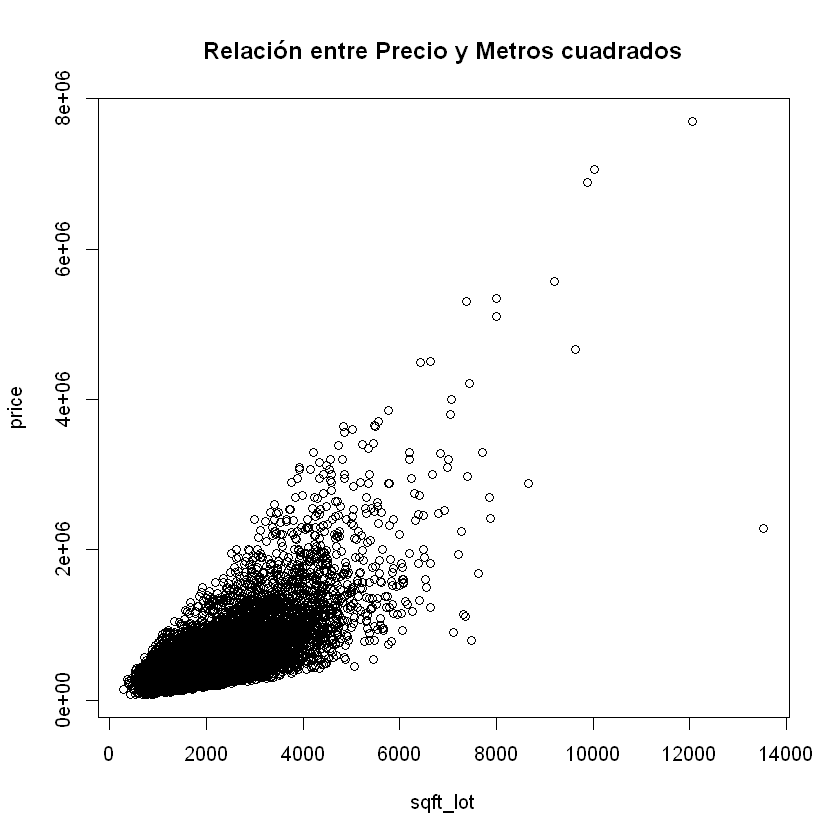

In [191]:
plot(y = casas.entrenamiento$price,x = casas.entrenamiento$sqft_living, main = 'Relación entre Precio y Metros cuadrados', ylab = 'price', xlab = 'sqft_lot')

La información del gráfico anterior podemos complementarla con una matriz de correlación:

In [192]:
cor(casas.entrenamiento)

,price,sqft_living
price,1.0000000,0.7093176
sqft_living,0.7093176,1.0000000


Como pudimos apreciar en la matriz de gráficos de dispersión, y confirmar con la matriz de correlación, hay una correlación significativa entre los variables price y sqft_lot

In [193]:
reg.price <- lm(price ~sqft_living, data = casas)

summary(reg.price)



Call:
lm(formula = price ~ sqft_living, data = casas)

Residuals:
     Min       1Q   Median       3Q      Max 
-1476062  -147486   -24043   106182  4362067 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -43580.743   4402.690  -9.899   <2e-16 ***
sqft_living    280.624      1.936 144.920   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 261500 on 21611 degrees of freedom
Multiple R-squared:  0.4929,	Adjusted R-squared:  0.4928 
F-statistic: 2.1e+04 on 1 and 21611 DF,  p-value: < 2.2e-16


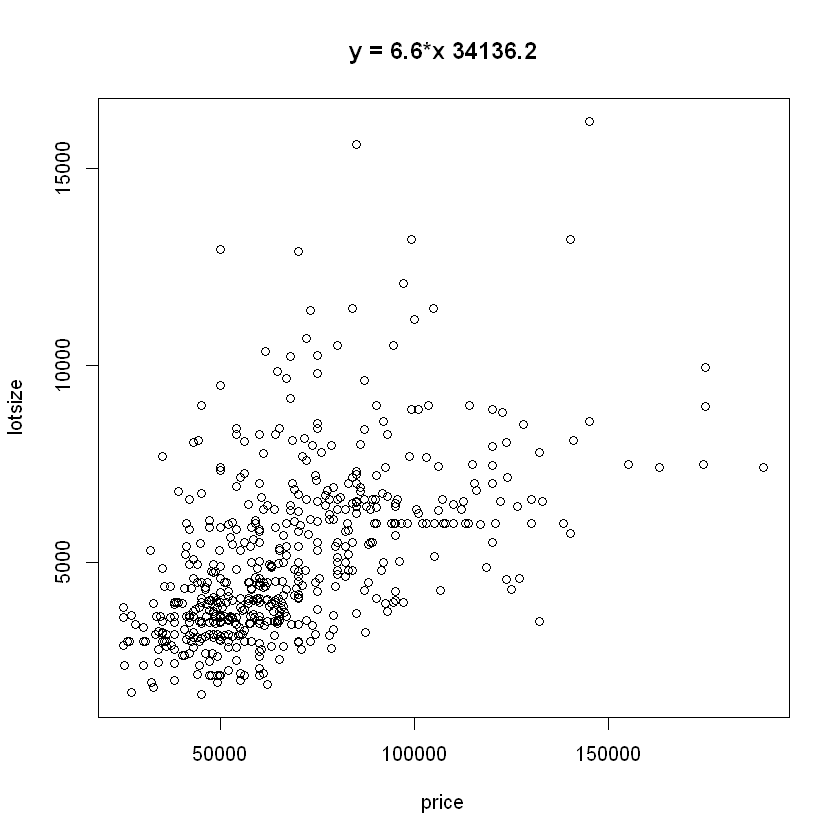

In [46]:

coeff=coefficients(reg.mpg)
eq = paste0("y = ", round(coeff[2],1), "*x ", round(coeff[1],1))
# plot
plot(autos[,c("price","lotsize")], main=eq)
abline(reg.mpg,log(data = autos), col="red")

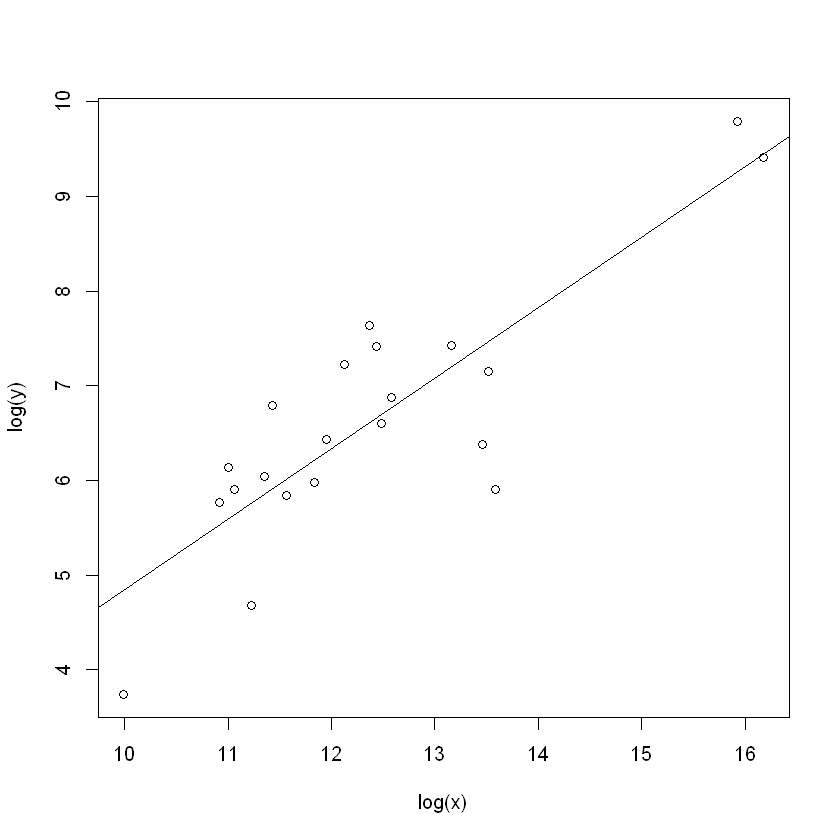

In [42]:
d = data.frame( x = c(154471 , 517423 , 704286 , 236117 , 10664898 , 21887 , 104994 , 794101 , 289567 , 74818 , 63920 , 251053 , 263583 , 84882 , 55075 , 741076 , 92000 , 137799 , 59856 , 184992 , 8292355), 
                   y = c(624 , 1681 , 590 , 2073 , 12189 , 42 , 343 , 365 , 969 , 108 , 366 , 1664 , 738 , 420 , 318 , 1278 , 887 , 395 , 462 , 1376 , 17907) 
                 ) 
plot(log(d), xlab="log(x)", ylab="log(y)") 
abline(lm(y ~ x, data = log(d))) 
